In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
df = pd.read_csv(r"C:\Users\sanooj\Desktop\Project\Covid\Indian_Kids_Screen_Time.csv")


In [2]:
df.drop(['Exceeded_Recommended_Limit','Educational_to_Recreational_Ratio'],axis = 1,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       9712 non-null   int64  
 1   Gender                    9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr  9712 non-null   float64
 3   Primary_Device            9712 non-null   object 
 4   Health_Impacts            6494 non-null   object 
 5   Urban_or_Rural            9712 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 455.4+ KB


In [4]:
avg_screentime_gender = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean()
avg_screentime_gender


Gender
Female    4.327021
Male      4.377754
Name: Avg_Daily_Screen_Time_hr, dtype: float64

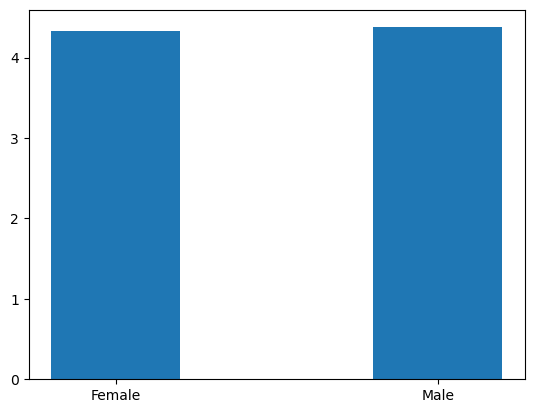

In [5]:
plt.bar(avg_screentime_gender.index,avg_screentime_gender.values,width=0.4)
plt.savefig("screen_time_by_gender.png", dpi=300, bbox_inches='tight')
plt.show()


In [6]:
Health = df['Health_Impacts'].dropna()

In [7]:
all_issue = [issue.strip() for entry  in Health for issue in entry.split(',')]

In [8]:
issue_counts = Counter(all_issue)
common = issue_counts.most_common(5)

In [9]:
issue = [issue for issue,count in common]
counts = [count for issue,count in common]

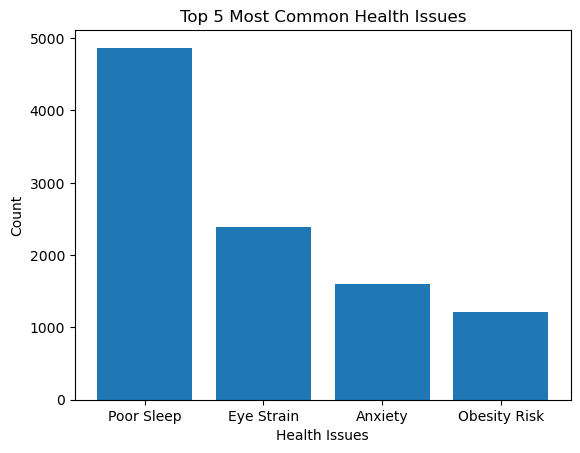

In [10]:
plt.title('Top 5 Most Common Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Count')
plt.bar(issue,counts)
plt.savefig('health_issues_bar_chart.png', dpi=300, bbox_inches='tight')

In [12]:
device_count = df['Primary_Device'].value_counts()

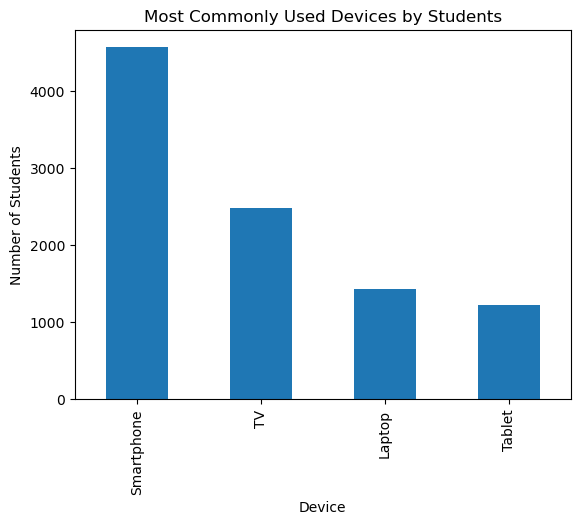

In [13]:
device_count.plot(kind='bar')
plt.title("Most Commonly Used Devices by Students")
plt.xlabel("Device")
plt.ylabel("Number of Students")
plt.savefig('Common used devices.png', dpi=300, bbox_inches='tight')

<Axes: title={'center': 'Health Issues by Screen Time Group'}, xlabel='ScreenTimeGroup'>

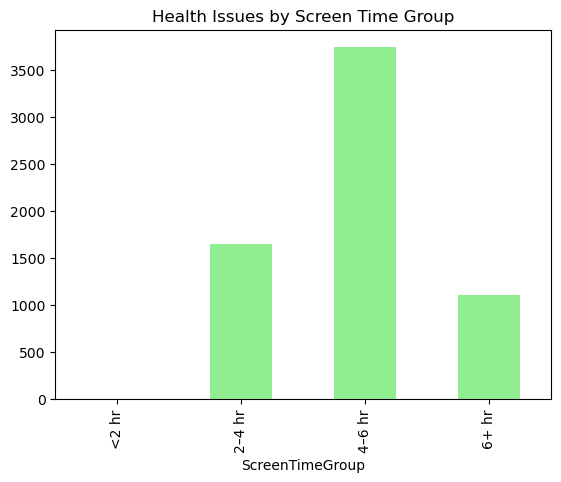

In [17]:
df = df.copy()  # Avoid chained assignment warning

bins = [0, 2, 4, 6, 24]
labels = ['<2 hr', '2–4 hr', '4–6 hr', '6+ hr']

df['ScreenTimeGroup'] = pd.cut(df['Avg_Daily_Screen_Time_hr'], bins=bins, labels=labels)

health_counts = df.groupby('ScreenTimeGroup', observed=True)['Health_Impacts'].count()

health_counts.plot(kind='bar', color='lightgreen', title='Health Issues by Screen Time Group')
